# Brazilian SARS-CoV-2 genomic sequences

With the pandemic, the huge ammount of genomic information with both great sequencing quality and taxonomic labels, which have been previously curated and created by a community of experts, created a great opportunity to study sequence representation, clustering and evolution. 

Unfortunatelly, as ~86K genomes is a huge and infeasible dataset to align and perform ML phylogeny, we used the well stablished augur to subsamble by year-month and obtain ~3K genomes (that are relatively uniform-distributed over time)

In [1]:
import os
os.chdir('nextclade.Brazil.sub.3k/')

In [ ]:
! augur filter --metadata Brazil.metadata.tsv --sequences Brazil.sequences.fasta --group-by year month --no-probabilistic-sampling --output-sequences Brazil.sub.3k.fasta --output-metadata Brazil.sub.3k.metadata.tsv --subsample-max-sequences 3000

We used nextclade tool to align genomes to reference and classify them following Nextclade lineages and WHO clade nomenclature.

In [ ]:
%%bash
sudo /dados/software/nextclade-Linux-x86_64 \
   --in-order \
   --input-fasta Brazil.sub.3k.fasta \
   --input-dataset /data/sars-cov-2 \
   --output-tsv Brazil.sub.3k.nextclade.tsv \
   --output-tree Brazil.sub.3k.nextclade.auspice.json \
   --output-dir nextclade.Brazil.sub.3k/ \
   --output-basename Brazil.sub.3k

Then, we estimated the Maximum-Likelihood tree with IQtree software

### WARNING: this should be only executed in a proper pc or server that can handle large resource consumption!!!

In [ ]:
! iqtree2 -T AUTO -m GTR+I+G -B 1000 --alrt 1000 -s Brazil.sub.3k.aligned.fasta

### Checking the resulting tree

In [3]:
%load_ext rpy2.ipython

In [9]:
%%R
library(tidyverse)  
library(ape) 
library(ggtree) 
library(tidytree)
library(treeio)

meta = read.csv("Brazil.sub.3k.nextclade.tsv", sep="\t", stringsAsFactors = F)
names(meta)[1] = "label"
glimpse(meta)


Rows: 2,951
Columns: 67
$ label                                           <chr> "hCoV-19/Brazil/PB-IEC…
$ clade                                           <chr> "20A", "20A", "20B", "…
$ Nextclade_pango                                 <chr> "B.1.212", "B.1.212", …
$ partiallyAliased                                <chr> "B.1.212", "B.1.212", …
$ clade_nextstrain                                <chr> "20A", "20A", "20B", "…
$ clade_who                                       <chr> "unassigned", "unassig…
$ clade_legacy                                    <chr> "20A", "20A", "20B", "…
$ qc.overallScore                                 <dbl> 0.000000, 0.000000, 0.…
$ qc.overallStatus                                <chr> "good", "good", "good"…
$ totalSubstitutions                              <int> 7, 11, 9, 11, 11, 10, …
$ totalDeletions                                  <int> 0, 0, 0, 0, 0, 0, 1, 2…
$ totalInsertions                                 <int> 0, 0, 0, 0, 0, 0, 0, 0…
$ totalFrameShif

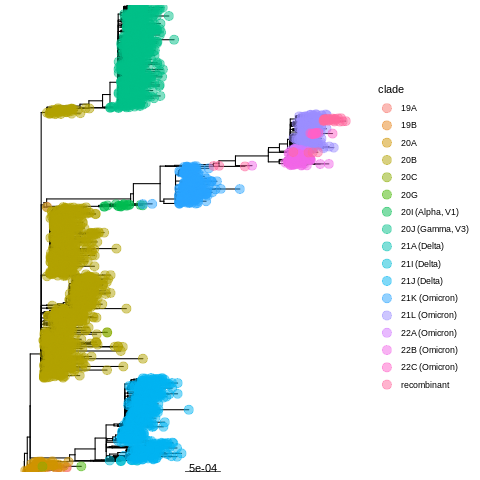

In [14]:
%%R
tree = read.iqtree("Brazil.sub.3k.aligned.fasta.contree") 

p = ggtree(tree, ladderize = T, brach.lenght = T)
p$data = left_join(p$data, meta, by="label") 
p1 = p + geom_tippoint(aes(color = clade), size = 4) +
  geom_treescale(width=0.0005, color="black") + 
  geom_text2(aes(label=label, subset = !is.na(as.numeric(label))), size = 4 , nudge_x = -0.00004, nudge_y = 22) +
  theme(legend.position="right") #+ xlim(-0.3,2.7) 

    
#svg("BR_cladeswithboots.svg", width = 100, height = 50)
#plot(p1)
#dev.off()

p = ggtree(tree, ladderize = T)
p$data = left_join(p$data, meta, by="label") 
p1 = p + geom_tippoint(aes(color = clade), alpha = 0.5, size = 4) +
  geom_treescale(width=0.0005, color='black') + 
  theme(legend.position="right") #+ xlim(-0.3,2.7) 

svg("FIG_BR_clades.svg", width = 10, height = 20)
plot(p1)
dev.off()

p1

As in this huge tree we can't see bootstrap values, a plausible workaround should be plotting the bootstrap values by x coordinates.

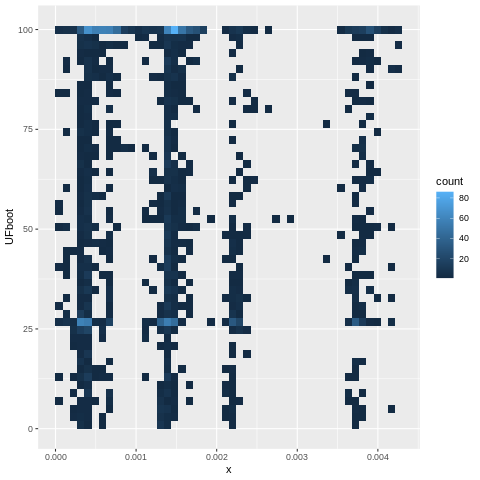

In [29]:
%%R
p$data %>% ggplot(aes(x = x, y = UFboot)) + geom_bin2d(bins = 50)

## Getting numerical representation from ~3K Brazilian sequences

In [31]:
! python3 ../numeric_encoding.py --fasta Brazil.sub.3k.fasta --repr 4-mer --thread 12 #natural 4-mer

File choosed:
Brazil.sub.3k.fasta
Numeric Encoding:
4-mer
Number of threads to use
12
(natural pid=79822) :ta
(natural pid=79822) sk_name:natural


In [32]:
! python3 ../numeric_encoding.py --fasta Brazil.sub.3k.fasta --repr 6-mer --thread 12 #natural 6-mer

File choosed:
Brazil.sub.3k.fasta
Numeric Encoding:
6-mer
Number of threads to use
12
(natural pid=141582) :ta
(natural pid=141582) sk_name:natural
(pid=160673) natural


In [33]:
! python3 ../numeric_encoding.py --fasta Brazil.sub.3k.fasta --repr c-4-mer --thread 12 #natural 4-mer

File choosed:
Brazil.sub.3k.fasta
Numeric Encoding:
c-4-mer
Number of threads to use
12
(natura pid=314807) l


In [34]:
! python3 ../numeric_encoding.py --fasta Brazil.sub.3k.fasta --repr c-6-mer --thread 12 #natural 6-mer

File choosed:
Brazil.sub.3k.fasta
Numeric Encoding:
c-6-mer
Number of threads to use
12
(natural pid=375525) :
(natural pid=375525) task_name:natural
(pid=445322) natural
(pid=544394) natural
(natural pid=548170) :ta
(natural pid=548170) sk_name:natural
